# Trabajo practico 1
Freddy Julian Riascos Salas


# Parte 1

**Punto 1**

**Algoritmo de coordenadas cromáticas**

In [118]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import os


#helper functions

def get_path_images(directory):
    files = []
    for entry in os.listdir(directory):
        full_path = os.path.join(directory, entry)
        if os.path.isfile(full_path):
            files.append(full_path)
    return files

def parse_image_to_rgb(image):
    return cv.cvtColor(image, cv.COLOR_BGR2RGB)

def get_image(image_path):
    img = cv.imread(image_path)
    return parse_image_to_rgb(img)
    

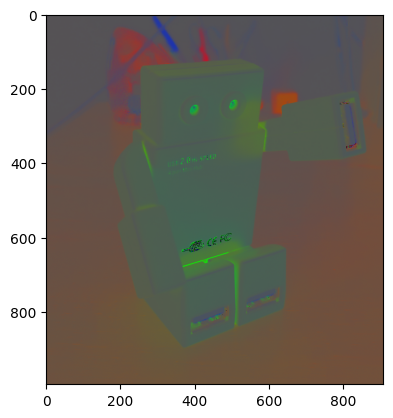

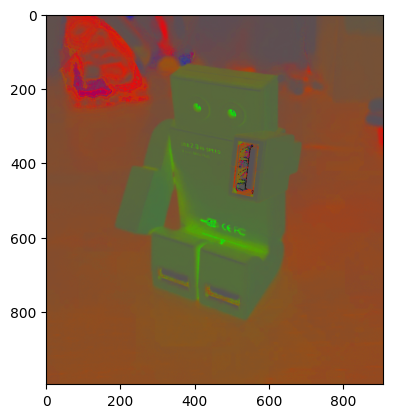

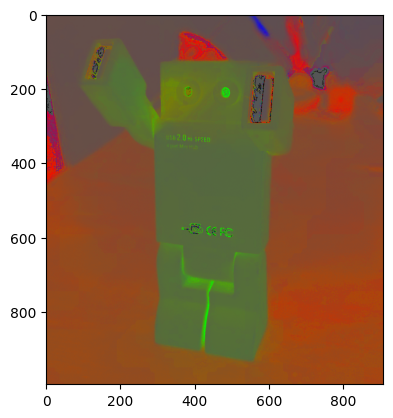

In [119]:

epsilon = 1e-6 #very small value to avoid division by zero without affecting the data in the image.
results = []
path_directory = "./TP1/coord_cromaticas"
for path in get_path_images(path_directory):
    #load the image and convert to RGB
    img_rgb = get_image(path)
    #get channels
    r,g,b = cv.split(img_rgb)
    #convert channels to float32 for precision
    r = r.astype(np.float32)
    g = g.astype(np.float32)
    b = b.astype(np.float32)
    #compute the channel sum for normalization
    sum_rgb = r+g+b
    #check the sum value for zero and replace by an epsilon
    epsilon = 1e-6 #very small value to avoid division by zero without affecting the data in the image.
    sum_rgb = np.where(sum_rgb == 0, epsilon, sum_rgb)
    # Calculate chromatic coordinates
    descriptor_r = r / sum_rgb
    descriptor_g = g / sum_rgb
    descriptor_b = b / sum_rgb
    
    r_scaled = (descriptor_r * 255).astype(np.uint8)
    g_scaled = (descriptor_g * 255).astype(np.uint8)
    b_scaled = (descriptor_b * 255).astype(np.uint8)

    merged_image = cv.merge([r_scaled, g_scaled, b_scaled])
    results.append(merged_image)


for i, result in enumerate(results):
    plt.figure(i+1)
    plt.imshow(result)
    plt.show()
    



**Punto 2**

**Algoritmo de white_patch**

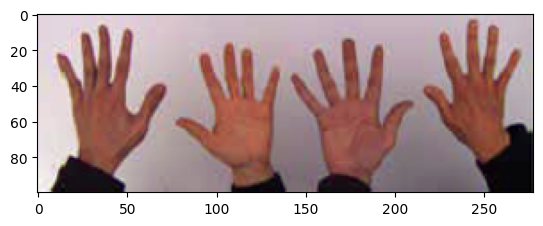

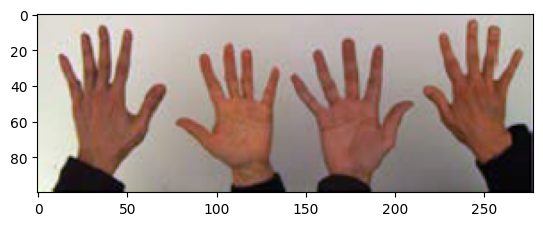

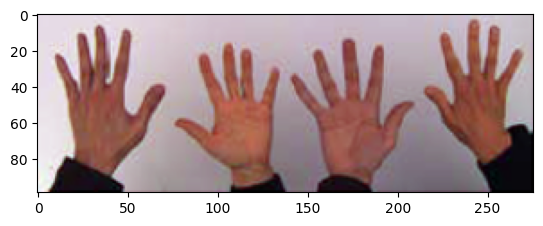

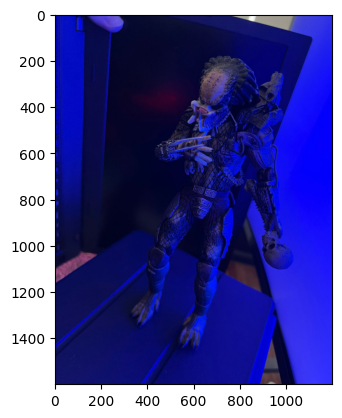

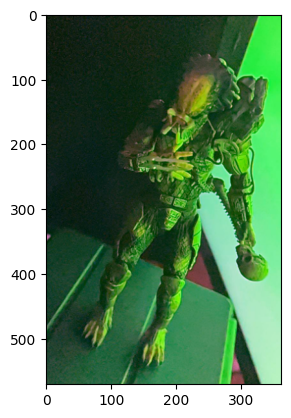

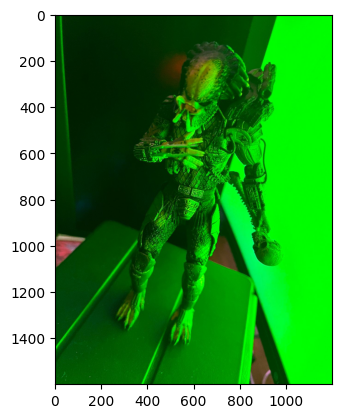

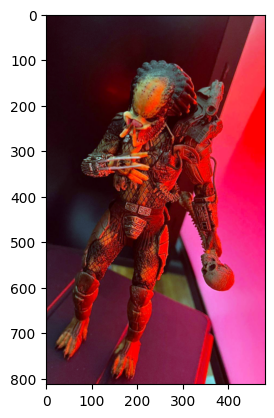

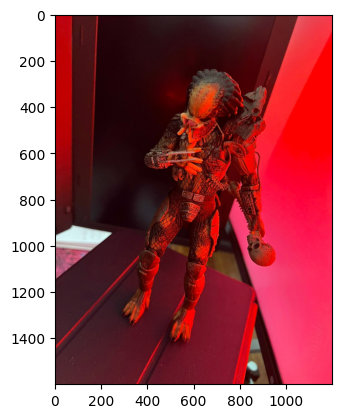

In [120]:
path_directory = "./TP1/white_patch"

for i, path in enumerate(get_path_images(path_directory)):
    img_rgb = get_image(path)
    r,g,b = cv.split(img_rgb)
    
    max_r = np.max(r)
    max_g = np.max(g)
    max_b = np.max(b)

    #scale each channel only if max is not 255
    if max_r != 255:
        r = (255 / max_r * r ).astype(np.uint8)
    if max_g != 255:
        g = (g / max_g * 255).astype(np.uint8)
    if max_b != 255:
        b = (b / max_b * 255).astype(np.uint8)
    normalized_image = cv.merge([r, g, b])

    plt.figure(i+1)
    plt.imshow(normalized_image)
    plt.show()
    
    


Conclusiones



# Parte 2

**Punto 1**


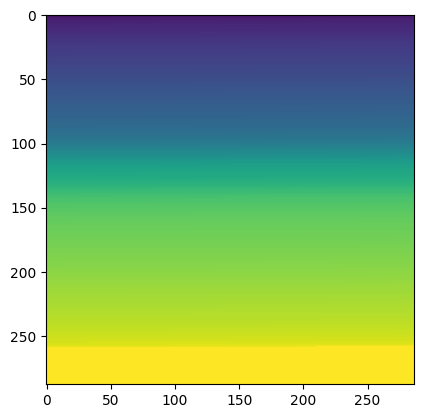

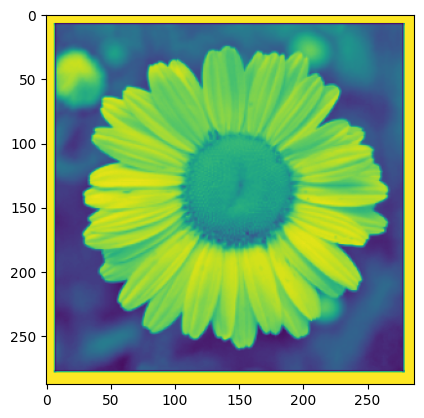

In [124]:
path_directory = "./TP1/"

for i, path in enumerate(get_path_images(path_directory)[0:2]):
    img_rgb = cv.imread(path, cv.IMREAD_GRAYSCALE)
    plt.figure(i+1)
    plt.imshow(img_rgb)
    plt.show()



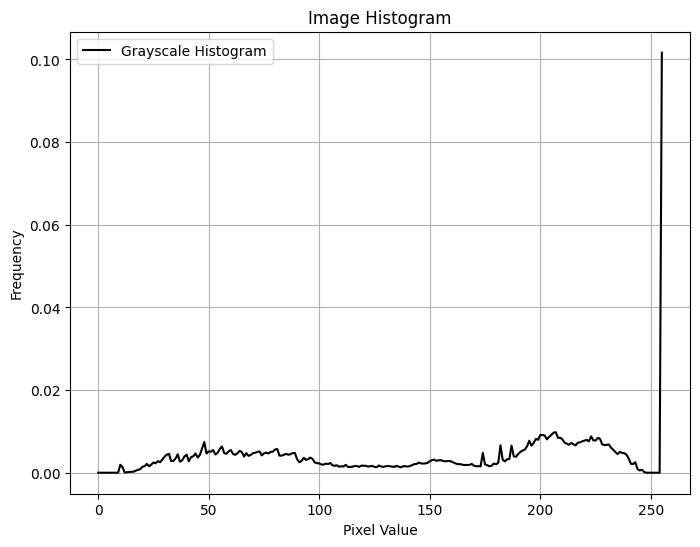

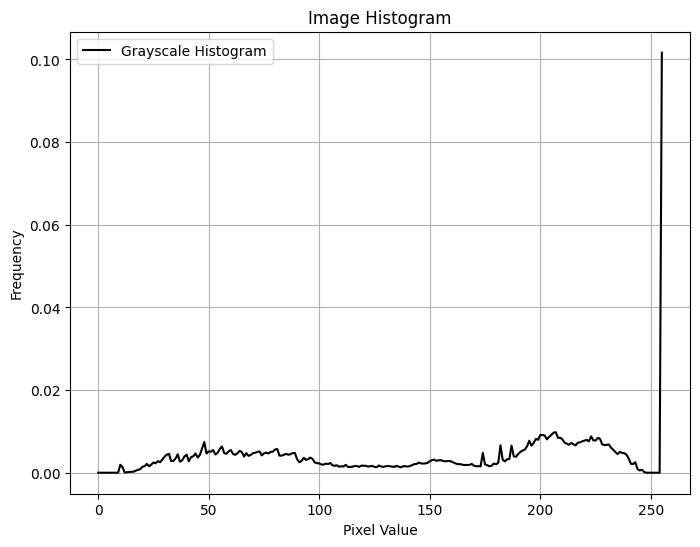

In [135]:
for i, path in enumerate(get_path_images(path_directory)[0:2]):
    img_gray = cv.imread(path, cv.IMREAD_GRAYSCALE)
    #calculate the histogram
    bins = 256 # Number of bins
    hist = cv.calcHist([img_gray], [0], None, [bins], [0, 256])
    hist = hist / hist.sum()
    plt.figure(figsize=(8, 6))
    plt.plot(hist, color='black', label='Grayscale Histogram')
    plt.title("Image Histogram")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid()
    plt.show()


**Punto 3**


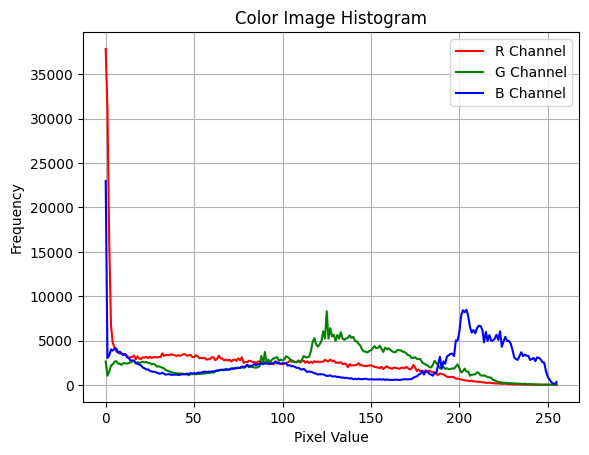

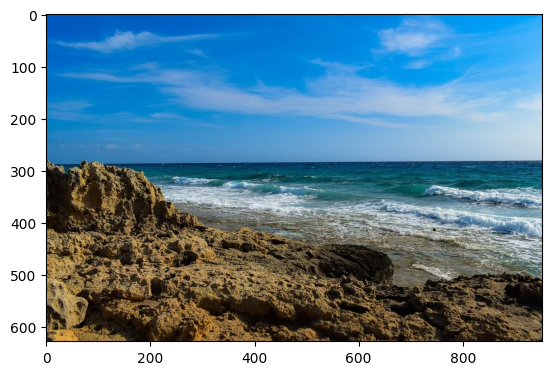

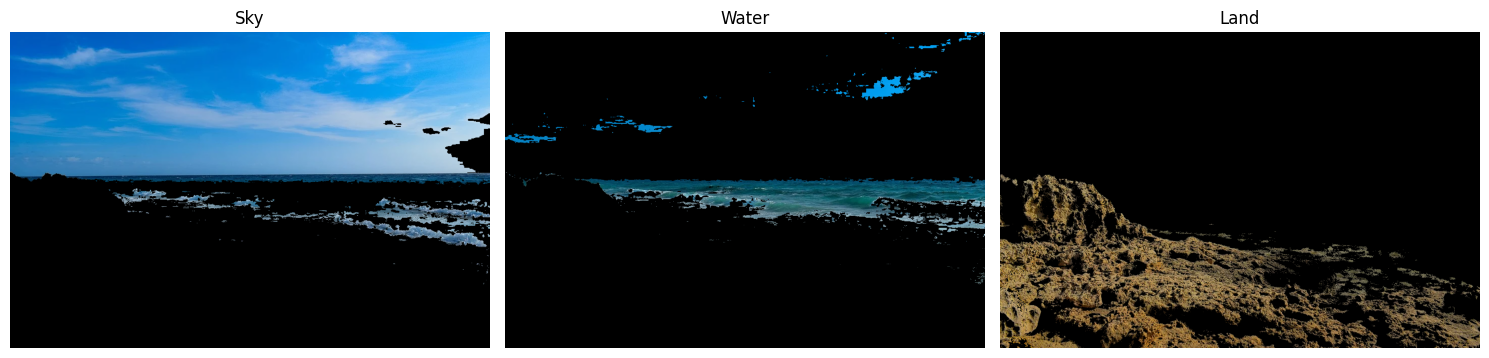

In [166]:
image_path = "./TP1/segmentacion.png"
imge = cv.imread(image_path)
image_rgb = cv.cvtColor(imge, cv.COLOR_BGR2RGB)
colors = ['r','g','b']
bins = 256 
for i,color in enumerate(colors):
    hist = cv.calcHist([imge_rgb], [i], None, [bins], [0,256])
    plt.plot(hist, color=color, label=f'{color.upper()} Channel')




plt.title("Color Image Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()


plt.figure()
plt.imshow(imge_rgb)
plt.show()


image_hsv = cv.cvtColor(imge, cv.COLOR_BGR2HSV)

#sky ranges and mask
lower_sky = np.array([100, 50, 50])
upper_sky = np.array([140, 255, 255])  
sky_mask = cv.inRange(image_hsv, lower_sky, upper_sky)
    
# water ranges and mask
lower_water = np.array([85, 50, 50])  
upper_water = np.array([100, 255, 255])
water_mask = cv.inRange(image_hsv, lower_water, upper_water)

#land
lower_land = np.array([10, 50, 50])
upper_land = np.array([30, 255, 200])
land_mask = cv.inRange(image_hsv, lower_land, upper_land)

#apply the mask
sky_segment = cv.bitwise_and(image_rgb, image_rgb, mask=sky_mask)
water_segment = cv.bitwise_and(image_rgb, image_rgb, mask=water_mask)
land_segment = cv.bitwise_and(image_rgb, image_rgb, mask=land_mask)

plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.title("Sky")
plt.imshow(sky_segment)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Water")
plt.imshow(water_segment)
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Land")
plt.imshow(land_segment)
plt.axis("off")

plt.tight_layout()
plt.show()